# Imports

In [89]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error 

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

# Read in the data

In [90]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('country_data_v2.csv')
df.head()

,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,ISO,Life expectancy,Meat consumption,Suicide rate,Male Height in Cm,Female Height in Cm,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,AFG,64.5,17.3,6.4,168.50,156.11,652864,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,NaN,125,125,1458,3568,-2110,-5121.0,68.6,8.2,0.3,3.3,NaN,NaN,NaN,27.7,61.6,8.3,42,2.1,NaN,63,5,NaN,NaN,21.43,-99
1,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,DZA,76.7,18.3,3.3,175.04,162.35,2381741,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,NaN,160,161,29992,47091,-17099,-27229.0,27.7,7.2,NaN,NaN,NaN,NaN,NaN,31.6,113.0,38.2,135,0.8,NaN,5900,55,NaN,NaN,0.05,-99
2,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,AGO,60.8,19.0,8.9,168.46,158.10,1246700,117955,3.0,4714.1,6.8,51.2,42.0,4.2,37.6,58.2,6.6,NaN,175,176,21011,8790,12221,-10273.0,65.4,3.3,NaN,NaN,NaN,NaN,NaN,38.2,60.8,12.4,146,46.5,NaN,3902,25,NaN,NaN,0.42,-99
3,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,ATG,76.9,56.0,0.5,178.84,165.72,442,1356,4.1,14764.5,1.9,18.3,79.8,NaN,NaN,NaN,NaN,NaN,88,88,61,491,-429,-204.0,9.1,5.5,-99.0,NaN,NaN,NaN,NaN,11.1,137.2,65.2,55,22.3,NaN,-99,84,NaN,NaN,0.12,-99
4,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58,ARG,76.5,79.7,9.1,174.76,161.22,2780400,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,NaN,119,119,57733,55610,2124,-15944.0,13.7,4.8,3.8,5.3,NaN,NaN,NaN,38.9,143.9,69.4,256,10.0,NaN,3167,85,NaN,NaN,0.01,-99


# Identify and remove any columns with Null values

In [91]:
df.isna().sum()

Country                                                         0
Population (2020)                                               0
Yearly Change                                                   0
Net Change                                                      0
Density (P/Km²)                                                 0
Land Area (Km²)                                                 0
Migrants (net)                                                  0
Fert. Rate                                                      0
Med. Age                                                        0
Urban Pop %                                                     0
World Share                                                     0
ISO                                                             0
Life expectancy                                                 0
Meat consumption                                                0
Suicide rate                                                    0
Male Heigh

In [92]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 37 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country                                                171 non-null    object 
 1   Population (2020)                                      171 non-null    int64  
 2   Yearly Change                                          171 non-null    float64
 3   Net Change                                             171 non-null    int64  
 4   Density (P/Km²)                                        171 non-null    int64  
 5   Land Area (Km²)                                        171 non-null    int64  
 6   Migrants (net)                                         171 non-null    int64  
 7   Fert. Rate                                             171 non-null    float64
 8   Med. Age                                          

# Identify any columns that have 0 standard deviation (aka constant values)

In [93]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Life expectancy,Meat consumption,Suicide rate,Male Height in Cm,Female Height in Cm,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI)
count,1.710000e+02,171.000000,1.710000e+02,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.0
mean,4.499742e+07,1.316374,4.824287e+05,193.970760,7.574137e+05,560.941520,2.835088,29.555556,57.502924,0.577251,71.766667,43.892398,9.582456,172.788129,160.587310,7.720739e+05,4.140765e+05,2.582456,11437.359064,28.636842,58.552632,118.929825,119.918129,8.268012e+04,8.403818e+04,-1358.017544,28.454971,5.382456,22.003509,106.257310,43.635088,245.292398,3227.269006,80.538012,-99.0
std,1.568421e+08,1.102764,1.298488e+06,674.587416,1.940542e+06,132690.305819,1.322274,9.147877,22.034031,2.012156,7.714089,35.118867,5.337629,4.924591,3.976703,2.027107e+06,1.698411e+06,4.583954,16353.593149,11.308398,13.827089,29.336101,29.868620,2.405326e+05,2.448098e+05,80744.717963,24.212071,11.651132,11.718316,37.786647,29.238388,328.168871,11356.110280,112.226255,0.0
min,9.792900e+04,-1.350000,-3.838400e+05,2.000000,3.200000e+02,-653249.000000,1.200000,15.000000,13.000000,0.000000,52.800000,3.000000,0.400000,160.130000,150.910000,-9.900000e+01,1.620000e+02,-28.100000,144.500000,4.000000,14.900000,-99.000000,-99.000000,3.000000e+00,1.160000e+02,-796494.000000,1.600000,-99.000000,0.000000,7.000000,1.100000,11.000000,-99.000000,4.000000,-99.0
25%,4.069615e+06,0.460000,8.674000e+03,30.500000,4.966000e+04,-14770.500000,1.800000,20.500000,39.000000,0.050000,66.000000,14.550000,5.900000,169.395000,158.130000,4.885300e+04,8.875000e+03,1.200000,1273.050000,21.300000,49.200000,103.000000,103.500000,1.738500e+03,2.767000e+03,-4155.500000,8.250000,4.900000,12.900000,81.500000,17.400000,63.500000,73.500000,17.000000,-99.0
50%,1.132662e+07,1.230000,1.089520e+05,73.000000,2.275400e+05,-2000.000000,2.400000,29.000000,57.000000,0.150000,73.100000,32.300000,9.100000,172.230000,160.200000,2.368000e+05,3.715600e+04,3.000000,4673.600000,27.700000,59.200000,118.000000,119.000000,6.505000e+03,9.130000e+03,-1104.000000,18.900000,6.000000,20.300000,108.000000,44.100000,131.000000,264.000000,38.000000,-99.0
75%,3.261614e+07,2.300000,4.431770e+05,149.000000,5.805575e+05,9870.500000,3.900000,38.000000,76.000000,0.420000,77.250000,68.400000,12.000000,176.265000,163.390000,5.896265e+05,1.946630e+05,4.800000,13918.650000,33.100000,68.800000,134.000000,134.500000,4.593250e+04,5.010950e+04,129.500000,46.500000,8.100000,29.800000,129.800000,69.500000,274.000000,1430.000000,98.500000,-99.0
max,1.439324e+09,3.840000,1.358663e+07,8358.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000,84.500000,145.900000,30.200000,183.780000,170.360000,1.709825e+07,1.803665e+07,26.300000,100160.800000,79.900000,87

In [94]:
df.columns

Index(['Country', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share', 'ISO', 'Life expectancy',
       'Meat consumption', 'Suicide rate', 'Male Height in Cm',
       'Female Height in Cm', 'Surface area (km2)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments 

In [95]:
df = df.drop('Net Official Development Assist. received (% of GNI)', axis=1)

# Exploratory Data Analysis

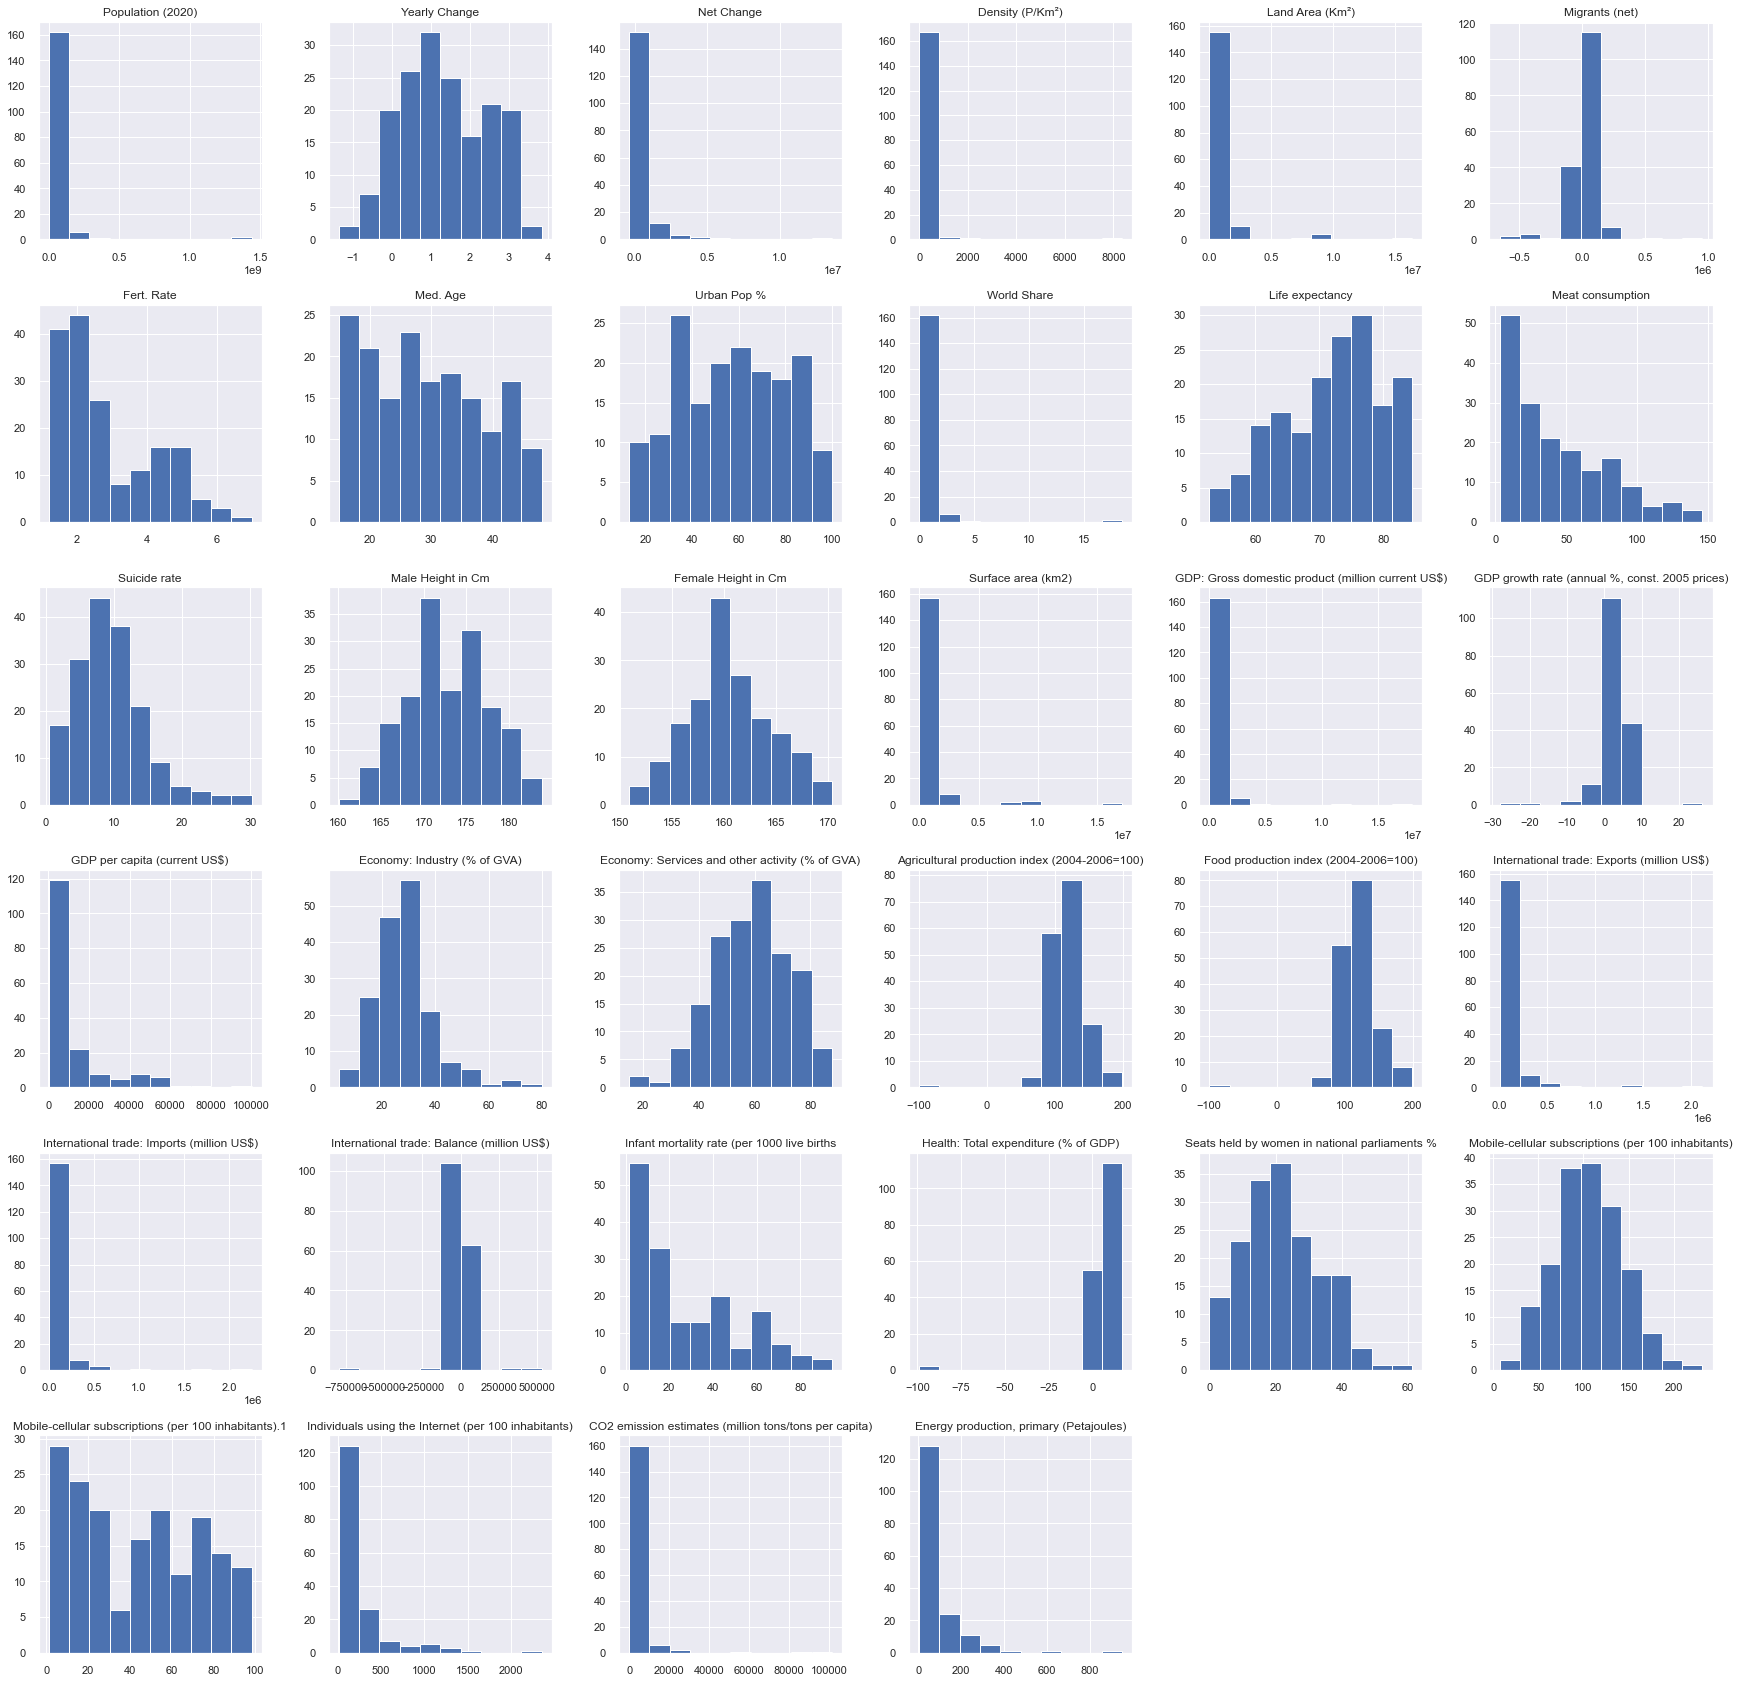

In [96]:
df.hist(figsize=(30,30))
plt.show()

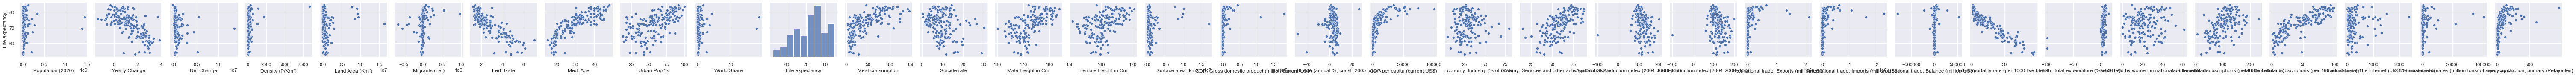

In [97]:
sns.pairplot(df, y_vars='Life expectancy')

## Medium Age, Meat Consumption, and GDP per capita might have a Polynomial relationship with life expectancy. This could be explore later, for now we will move forward with the analysis.

In [98]:
df.columns

Index(['Country', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share', 'ISO', 'Life expectancy',
       'Meat consumption', 'Suicide rate', 'Male Height in Cm',
       'Female Height in Cm', 'Surface area (km2)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments 

# OPTIONAL ------ Polynomial features to explore ------ OPTIONAL
* Med. Age
* Meat Consumption
* GDP per cpita (current US$)

In [144]:
X = df[['Med. Age']]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names())
X_train_poly.head()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x0^2
0,19.0,361.0
1,18.0,324.0
2,18.0,324.0
3,28.0,784.0
4,18.0,324.0


In [145]:
def fit_polynomial(degree, feature):
    # Print message with polynomial
    print(f'Fitting a polynomial of degree {degree}')
        
    # Create polynomial features and transform variables
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.fit_transform(X_plot)

    # Define and train linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    
    # Generate predictions
    train_preds = lin_reg.predict(X_train_poly)
    test_preds = lin_reg.predict(X_test_poly)
    plot_preds = lin_reg.predict(X_plot_poly)
    
    # Calculate and print the MAE for train and test
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    print('Train MAE:', train_mae)
    print('Test MAE:', test_mae)
    print()

    # Plot the regression line using X_plot and the predictions generated for the transformed X_plot
    sns.lineplot(X_plot['x'], plot_preds, label=f'Degree {degree}')
    
    # Plot the training and testing data
    sns.scatterplot(x=X_train[str(feature)], y=y_train)
    sns.scatterplot(x=X_test[str(feature)], y=y_test)
    
    # Set the y axis limit to -2, 2
    #plt.ylim(-2, 2)

Fitting a polynomial of degree 1
Train MAE: 2.9094648164798587
Test MAE: 3.518754125044159



/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


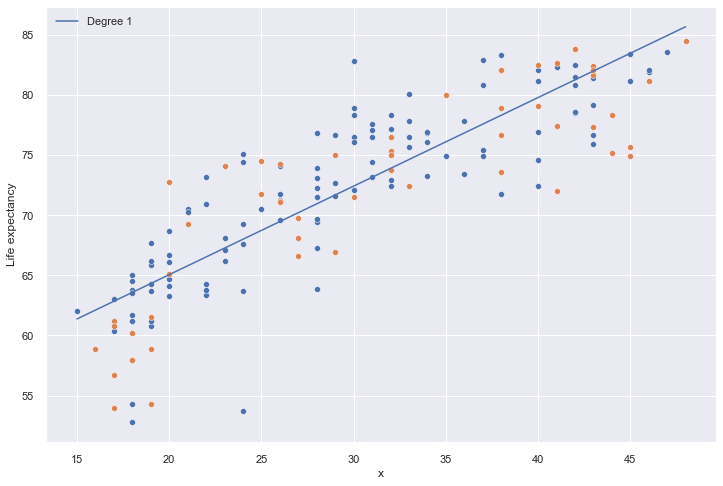

In [146]:
plt.figure(figsize=(12, 8))
fit_polynomial(1, 'Med. Age')

Fitting a polynomial of degree 2
Train MAE: 2.6664754846821226
Test MAE: 3.0518426522188897



/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


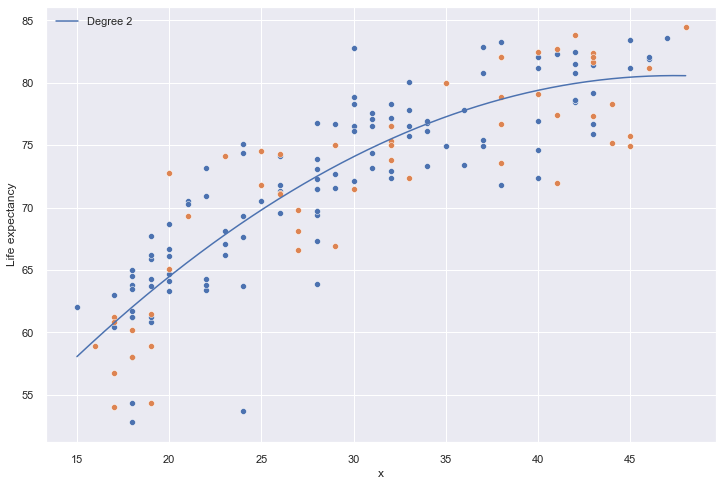

In [147]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'Med. Age')

## We can see that this fits much better than the linear model. That allows us some confidence when adding this relationship to the overall regression model.

### Now we will do the same approach with our other features.

In [148]:
X = df[['Meat consumption']]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names())
X_train_poly.head()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x0^2
0,7.9,62.41
1,6.5,42.25
2,5.1,26.01
3,3.1,9.61
4,13.0,169.00


/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fitting a polynomial of degree 1
Train MAE: 4.25462423967268
Test MAE: 5.030746760138612



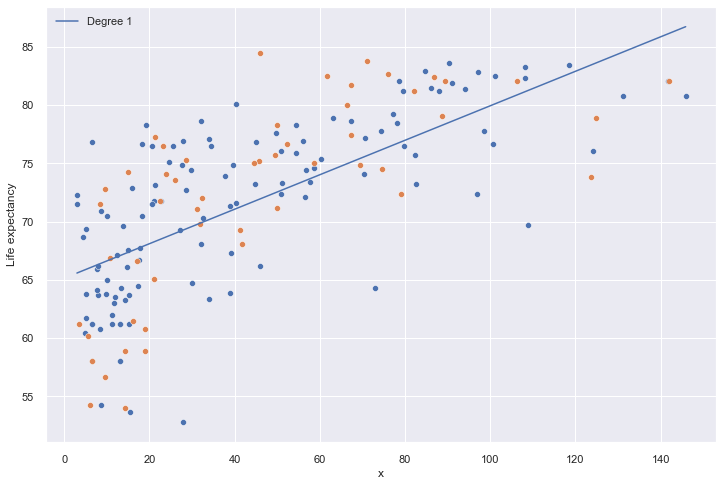

In [149]:
plt.figure(figsize=(12, 8))
fit_polynomial(1, 'Meat consumption')

Fitting a polynomial of degree 2
Train MAE: 3.9271540659625295
Test MAE: 4.435778771805049



/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


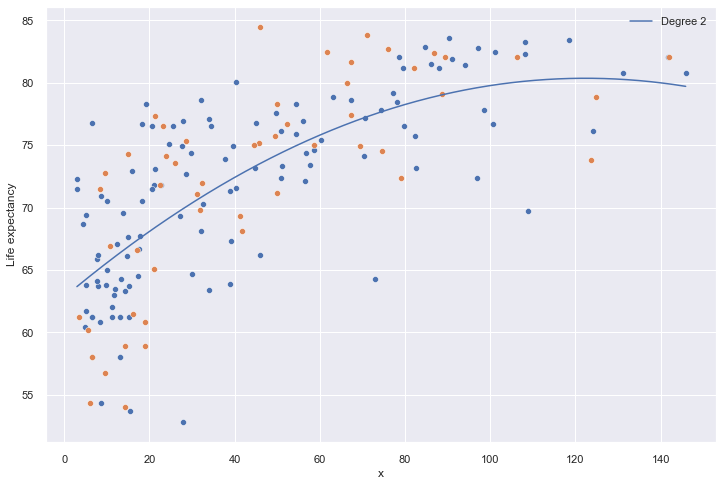

In [150]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'Meat consumption')

In [151]:
X = df[['GDP per capita (current US$)']]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names())
X_train_poly.head()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x0^2
0,455.9,207844.81
1,703.9,495475.21
2,372.9,139054.41
3,1207.9,1459022.41
4,703.9,495475.21


Fitting a polynomial of degree 2
Train MAE: 4.0640180927751945
Test MAE: 4.526121789497544



/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


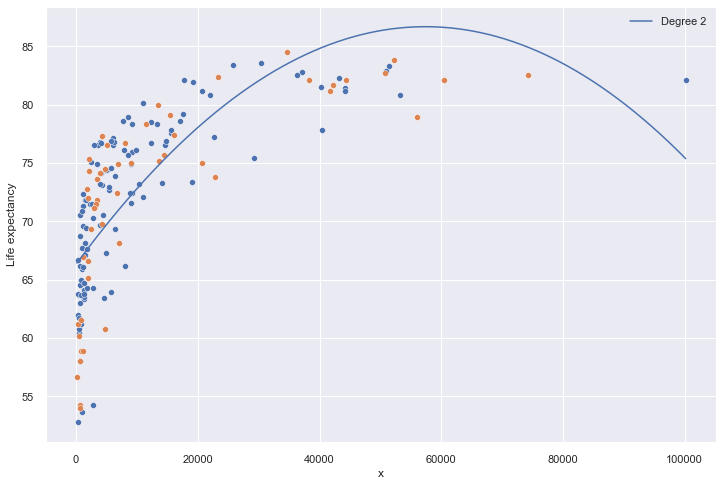

In [152]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'GDP per capita (current US$)')

In [153]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Med_poly = poly.fit_transform(df['Med. Age'].to_numpy().reshape(-1,1))
Meat_poly = poly.fit_transform(df['Meat consumption'].to_numpy().reshape(-1,1))
GDP_poly = poly.fit_transform(df['GDP per capita (current US$)'].to_numpy().reshape(-1,1))

Med_poly = pd.DataFrame(Med_poly, columns=["Med. Age1", "Med. Age2"])
Meat_poly = pd.DataFrame(Meat_poly, columns=["Meat1", "Meat2"])
GDP_poly = pd.DataFrame(GDP_poly, columns=["GDP1", "GDP2"])

# Now we can use those polynomials later in the analysis.

<AxesSubplot:>

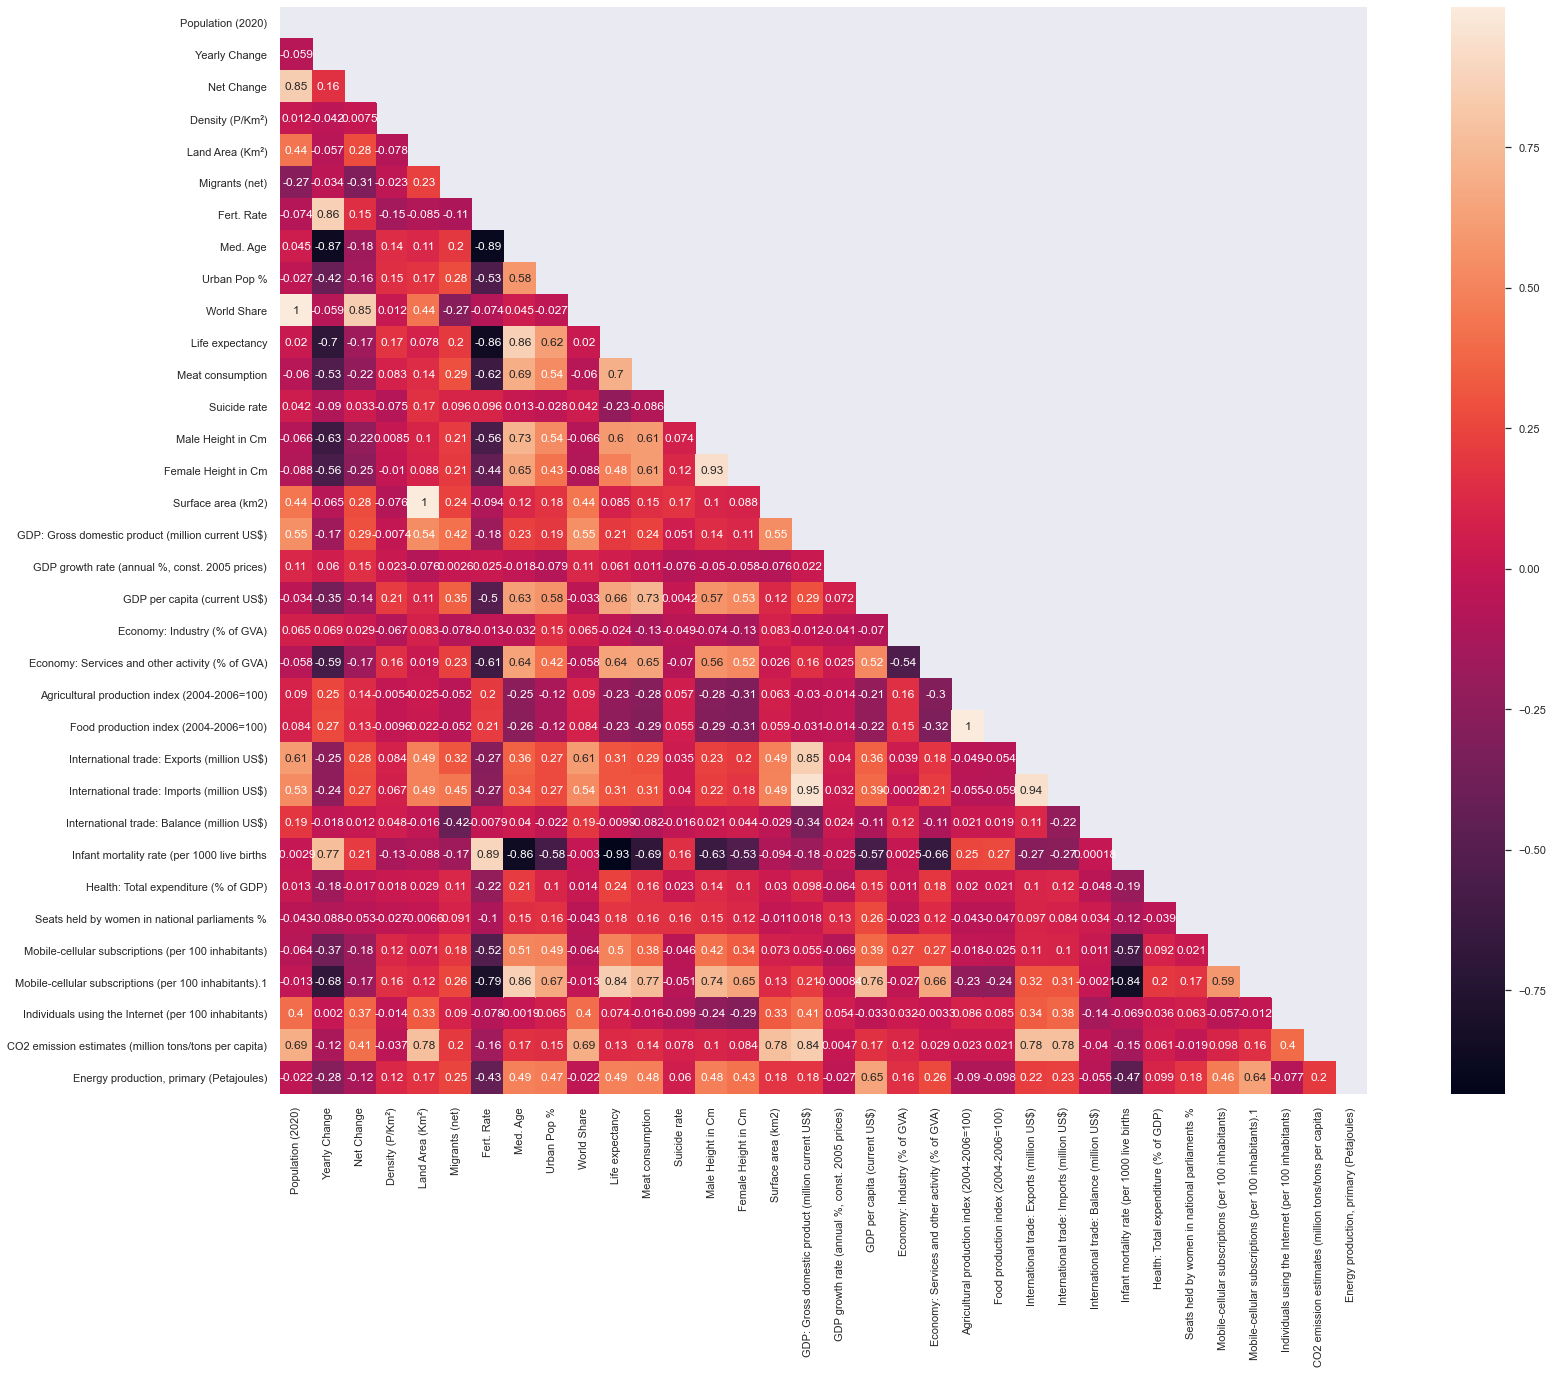

In [154]:
sns.set(rc = {'figure.figsize':(30,20)})
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, square=True)

### For now I will leave all the features in and allow the OLS model to deal with the multicollinearity that is seen above.

# Set X and y variables for Regression Model

In [155]:
X = df.drop(columns=['Life expectancy', 'Country', 'ISO'])
y = df['Life expectancy']

In [156]:
X = sm.add_constant(X)

In [157]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     68.21
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.18e-69
Time:                        15:10:23   Log-Likelihood:                -347.12
No. Observations:                 171   AIC:                             762.2
Df Residuals:                     137   BIC:                             869.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# Remove features
## We can see that a number of features have extremely high p-values. The first round was focused on cutting all p-values above 0.8

In [158]:
X.columns

Index(['const', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share', 'Meat consumption',
       'Suicide rate', 'Male Height in Cm', 'Female Height in Cm',
       'Surface area (km2)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular 

In [159]:
X = X.drop(['Population (2020)', 'Density (P/Km²)','World Share', 'Energy production, primary (Petajoules)',
            'Surface area (km2)', 'Land Area (Km²)', 'Meat consumption', 
            'GDP: Gross domestic product (million current US$)',
            'Energy production, primary (Petajoules)'], axis=1)

In [160]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     86.93
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.18e-74
Time:                        15:10:24   Log-Likelihood:                -354.51
No. Observations:                 171   AIC:                             761.0
Df Residuals:                     145   BIC:                             842.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## The same process was followed, slowly removing features.

In [161]:
X.columns

Index(['const', 'Yearly Change', 'Net Change', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'Suicide rate', 'Male Height in Cm',
       'Female Height in Cm', 'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Mobile-cellular subscriptions (per 100 inhabitants).1',
       'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (

In [162]:
X = X.drop(['Migrants (net)', 'Fert. Rate', 'Mobile-cellular subscriptions (per 100 inhabitants).1'], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.40e-77
Time:                        15:10:25   Log-Likelihood:                -354.67
No. Observations:                 171   AIC:                             755.3
Df Residuals:                     148   BIC:                             827.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [163]:
X.columns

Index(['const', 'Yearly Change', 'Net Change', 'Med. Age', 'Urban Pop %',
       'Suicide rate', 'Male Height in Cm', 'Female Height in Cm',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (million tons/tons per capita)'],
      dtype='object')

In [164]:
X = X.drop(['GDP growth rate (annual %, const. 2005 prices)', 
            'Economy: Services and other activity (% of GVA)',
            'International trade: Exports (million US$)', 
            'International trade: Imports (million US$)', 
            'International trade: Balance (million US$)',], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           3.83e-82
Time:                        15:10:25   Log-Likelihood:                -356.39
No. Observations:                 171   AIC:                             748.8
Df Residuals:                     153   BIC:                             805.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [165]:
X.columns

Index(['const', 'Yearly Change', 'Net Change', 'Med. Age', 'Urban Pop %',
       'Suicide rate', 'Male Height in Cm', 'Female Height in Cm',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (million tons/tons per capita)'],
      dtype='object')

In [166]:
X = X.drop(['Net Change', 'Male Height in Cm',
            'Economy: Industry (% of GVA)', 'Individuals using the Internet (per 100 inhabitants)',
            'CO2 emission estimates (million tons/tons per capita)'], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           2.26e-86
Time:                        15:10:25   Log-Likelihood:                -359.77
No. Observations:                 171   AIC:                             745.5
Df Residuals:                     158   BIC:                             786.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [167]:
X.columns

Index(['const', 'Yearly Change', 'Med. Age', 'Urban Pop %', 'Suicide rate',
       'Female Height in Cm', 'GDP per capita (current US$)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)'],
      dtype='object')

In [168]:
X = X.drop([ 'Agricultural production index (2004-2006=100)', 
            'Food production index (2004-2006=100)'], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     220.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.60e-88
Time:                        15:10:25   Log-Likelihood:                -361.40
No. Observations:                 171   AIC:                             744.8
Df Residuals:                     160   BIC:                             779.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [169]:
X.columns

Index(['const', 'Yearly Change', 'Med. Age', 'Urban Pop %', 'Suicide rate',
       'Female Height in Cm', 'GDP per capita (current US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)'],
      dtype='object')

In [170]:
X = X.drop(['Yearly Change'], axis=1)

In [171]:
X = X.rename(columns={'Infant mortality rate (per 1000 live births':'Infant mortality', 
                  'Health: Total expenditure (% of GDP)' : 'Health Totals',
                   'Seats held by women in national parliaments %' : 'Female Parliament(%)',
                   'Mobile-cellular subscriptions (per 100 inhabitants)' : 'Cell Phone Subs'})

In [172]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.87e-88
Time:                        15:10:26   Log-Likelihood:                -363.41
No. Observations:                 171   AIC:                             746.8
Df Residuals:                     161   BIC:                             778.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Happy with this model as we maintained a 0.93 with our R-squared, although the model is suggesting we check for multicollinearity within the data.

We will do that below, but first let's understand what the model is telling us.

### The following features have a positive impact on the model outcome, suggesting that as these features are increased, the model predicts a higher life expectancy:

* Medium Age
* Percentage of Population in Urban areas
* GDP per capita
* Total spend on healthcare (%)
* Percentage of females holding parliamentary seats

### The following features have a negative impact on the model outcome, suggesting that as these features are increased, the model predicts a lower life expectancy:

* Suicide Rate
* Female Height
* Infant Mortality
* Cell phone subscriptions per 100 individuals

# ------------Stretch------------
## Polynomial features

In [173]:
X = df.drop(columns=['Life expectancy', 'Country', 'ISO'])
y = df['Life expectancy']

X = pd.concat([X, Med_poly], axis=1, join="inner")
X = pd.concat([X, Meat_poly], axis=1, join="inner")
X = pd.concat([X, GDP_poly], axis=1, join="inner")

## Drop the original feature as we have added in the polynomial features

In [174]:
X = X.drop(columns = ['Med. Age', 'Meat consumption', 'GDP per capita (current US$)'])

In [175]:
X = sm.add_constant(X)

In [176]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     64.91
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.58e-68
Time:                        15:10:30   Log-Likelihood:                -342.32
No. Observations:                 171   AIC:                             758.6
Df Residuals:                     134   BIC:                             874.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [177]:
X.columns

Index(['const', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Urban Pop %', 'World Share', 'Suicide rate', 'Male Height in Cm',
       'Female Height in Cm', 'Surface area (km2)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Mobile-cellular subscript

In [178]:
X = X.drop([ 'Population (2020)', 'Yearly Change','Density (P/Km²)', 'Land Area (Km²)', 
            'Migrants (net)', 'Fert. Rate', 'Urban Pop %', 'World Share', 'Surface area (km2)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Mobile-cellular subscriptions (per 100 inhabitants).1',
       'Energy production, primary (Petajoules)', 'Med. Age2',
       'Meat1', 'Meat2'
           ], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           6.13e-85
Time:                        15:10:31   Log-Likelihood:                -360.50
No. Observations:                 171   AIC:                             749.0
Df Residuals:                     157   BIC:                             793.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [179]:
X = X.drop(['Net Change', 'Male Height in Cm', 'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (million tons/tons per capita)'
           ], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.94e-88
Time:                        15:10:32   Log-Likelihood:                -363.45
No. Observations:                 171   AIC:                             746.9
Df Residuals:                     161   BIC:                             778.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


# ----------Stretch----------
## Dealing with multicollinearity

<AxesSubplot:>

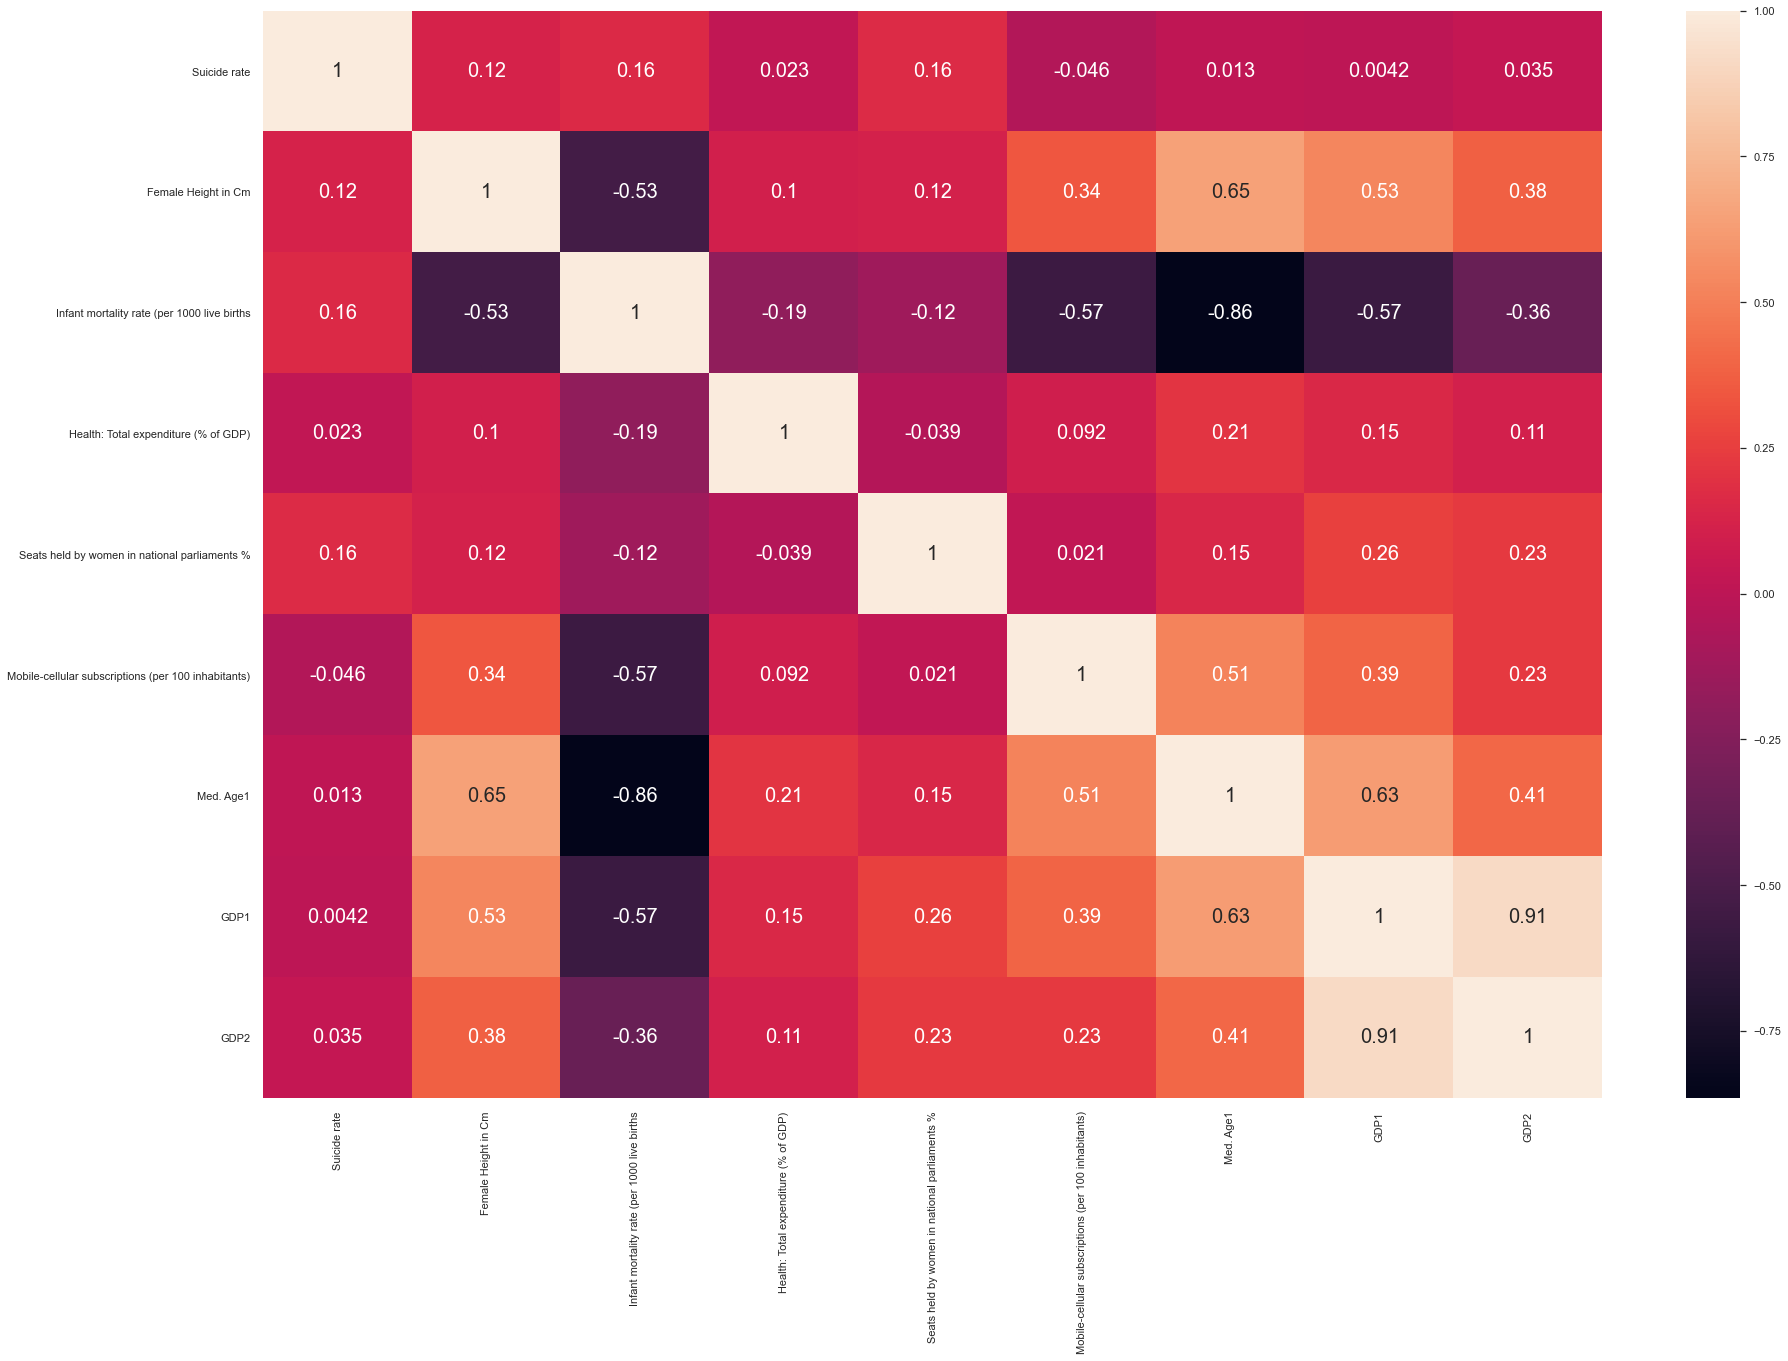

In [184]:
sns.heatmap(X.drop('const', axis=1).corr(), annot=True, annot_kws={"fontsize":20})

In [185]:
X.columns

Index(['const', 'Suicide rate', 'Female Height in Cm',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Mobile-cellular subscriptions (per 100 inhabitants)', 'Med. Age1',
       'GDP1', 'GDP2'],
      dtype='object')

In [186]:
X2 = X.drop(['Med. Age1', 'Infant mortality rate (per 1000 live births'], axis=1)

In [187]:
result = sm.OLS(y, X2).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     45.33
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           3.83e-35
Time:                        15:13:21   Log-Likelihood:                -499.10
No. Observations:                 171   AIC:                             1014.
Df Residuals:                     163   BIC:                             1039.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

## We can see that the model accuracy took a deep dive after we got rid of these features. This might suggest we stick with the previous model if we want to use this for predictive power.

# Prediction time

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
sns.set(rc = {'figure.figsize':(15,12)})

# Linear Regression Model

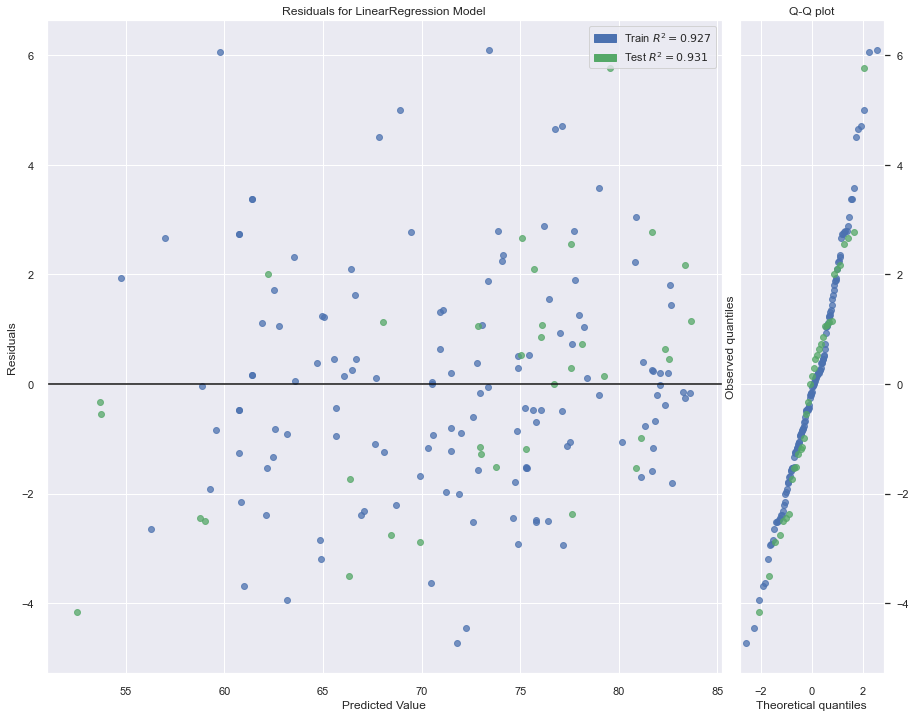

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [190]:
model = LinearRegression()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


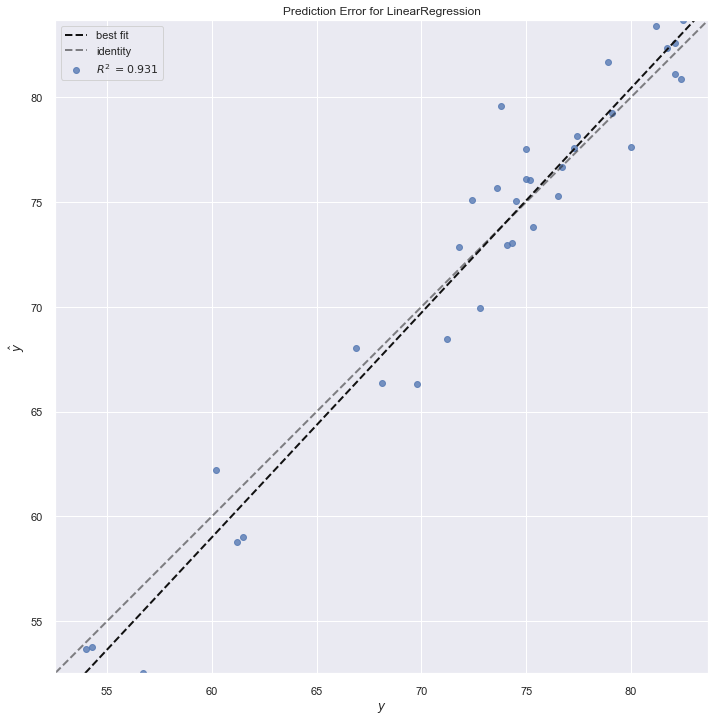

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [191]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

# Ridge Regularisation

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.72615e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


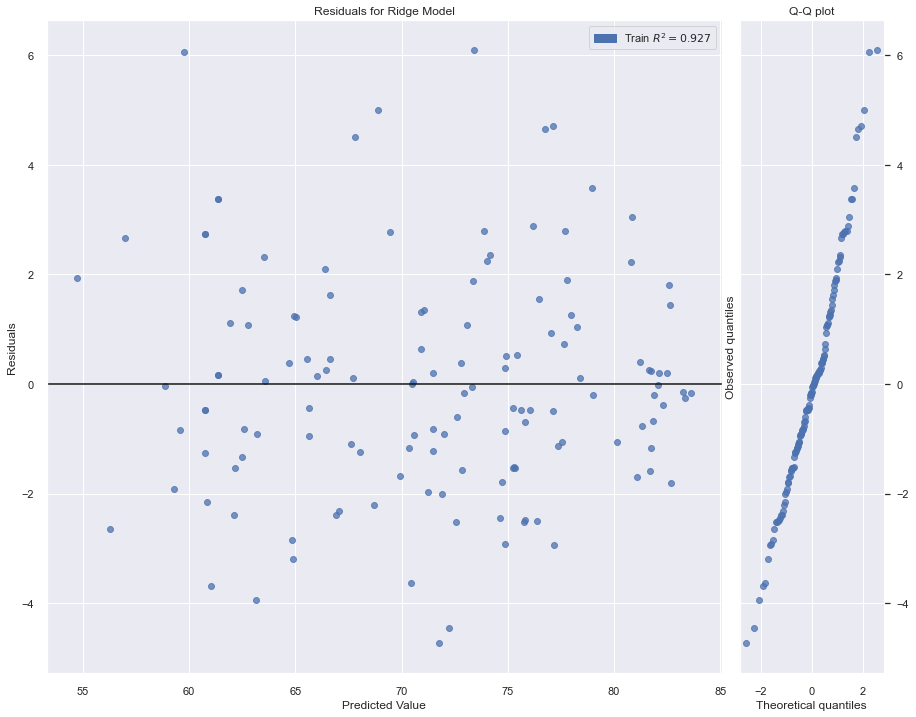

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [192]:
model = Ridge()
visualizer_residuals = ResidualsPlot(model, hist=False, qqplot=True)
visualizer_residuals.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer_residuals.show()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


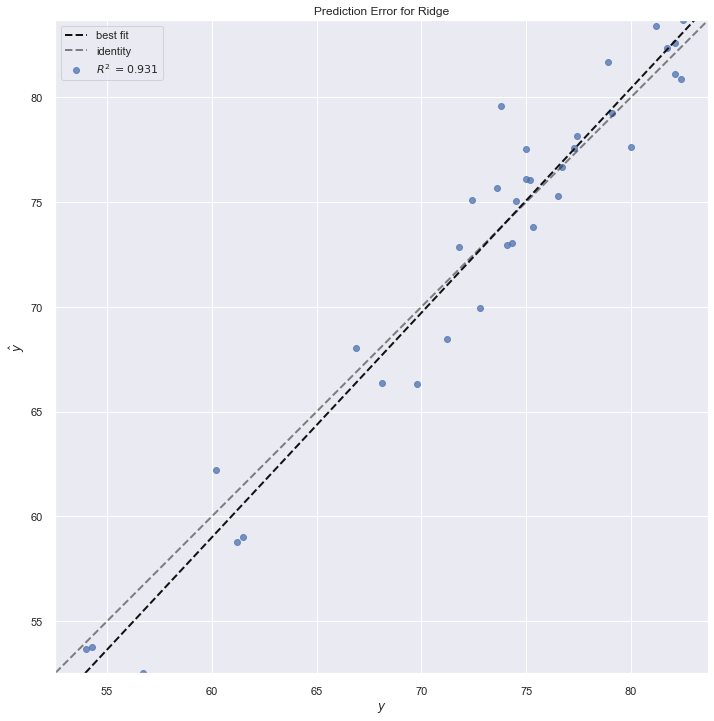

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [193]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Lasso Regularisation

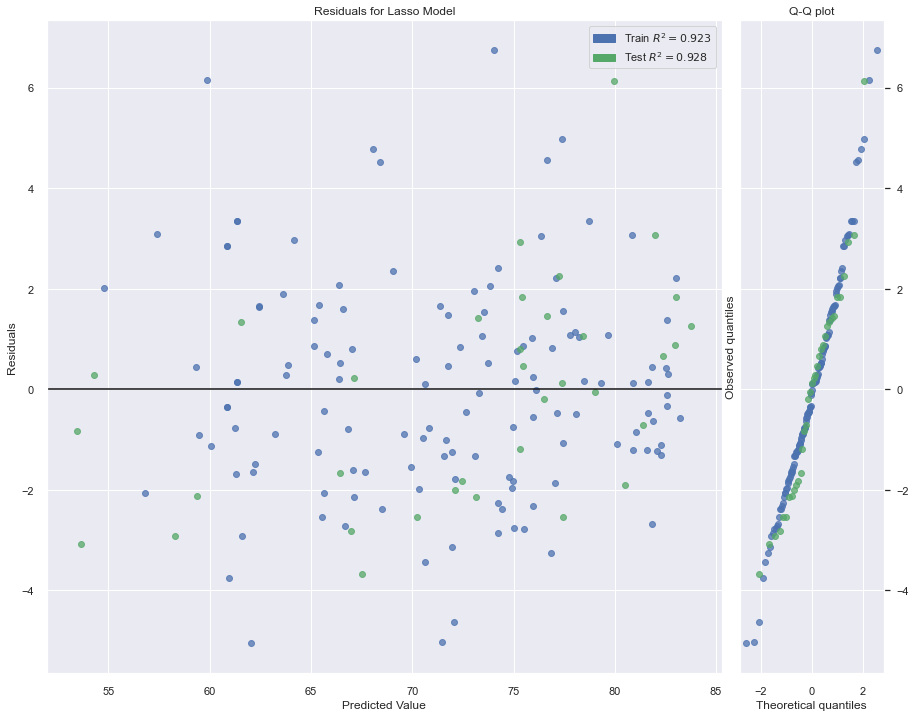

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [194]:
model = Lasso()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


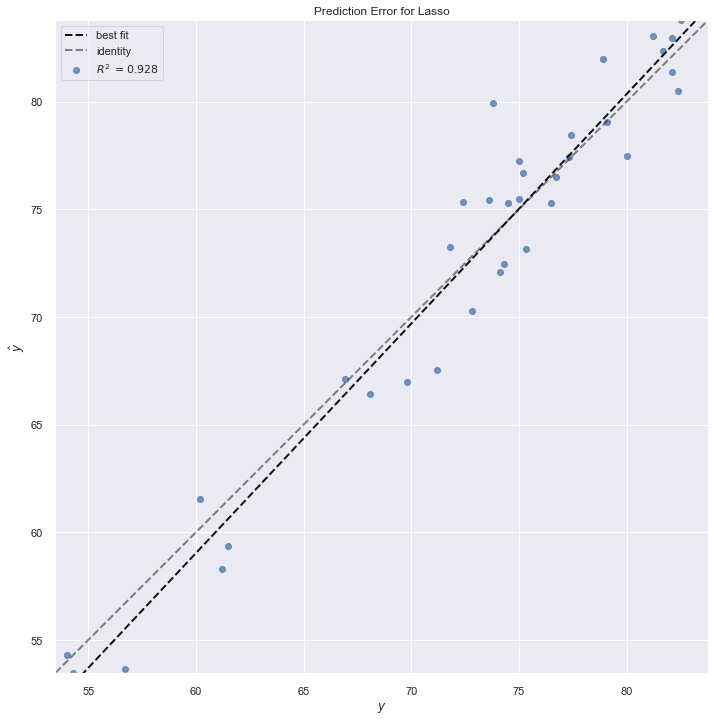

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [195]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()